# Neural Network

## Import and Settings

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from joblib import dump
import dask.dataframe as dd

In [2]:
df = dd.read_csv('prepared_ds.csv')

## Initialise Sample Dataframe

In [3]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()

In [4]:
df_fast.shape

(75666, 41)

## Train-Test-Split

In [10]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[~df_fast.columns.isin(['Unnamed: 0', 'Label'])]], df_fast['Label'], test_size=0.2, random_state=1)

In [11]:
continuous_vars = [i for i in train.columns if 'PC-' in i]
category_vars = [i for i in train.columns if i not in continuous_vars]

## Training

In [12]:
parameters = {
    'hidden_layer_sizes': [(20, 10, 5)],
    'max_iter': [1000, 2000],
    'alpha': [1e-3, 1e-4, 1e-5, 1e-7, 1e-8],
    'random_state': [1],
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ('lbfgs', 'sgd', 'adam')
}
mlp = MLPClassifier()

In [ ]:
%%time
clf_grid = GridSearchCV(mlp, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=4, return_train_score=True)
clf_grid.fit(train, train_lbl)

In [ ]:
clf_grid.cv_results_

In [13]:
%%time
clf_random = RandomizedSearchCV(mlp, param_distributions=parameters, scoring='accuracy', n_jobs=-1, verbose=4, return_train_score=True)
clf_random.fit(train, train_lbl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\applications\ddos-dompteure\ml_vnev\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Wall time: 23min 4s


RandomizedSearchCV(estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ('identity', 'logistic',
                                                       'tanh', 'relu'),
                                        'alpha': [0.001, 0.0001, 1e-05, 1e-07,
                                                  1e-08],
                                        'hidden_layer_sizes': [(20, 10, 5)],
                                        'max_iter': [1000, 2000],
                                        'random_state': [1],
                                        'solver': ('lbfgs', 'sgd', 'adam')},
                   return_train_score=True, scoring='accuracy', verbose=4)

In [21]:
clf_random.cv_results_

{'mean_fit_time': array([476.73016744,  40.71040783,  89.8667583 , 307.67620344,
        295.66315489, 104.91493731,  78.1060317 , 286.82048726,
        104.42820249,  45.42308559]),
 'std_fit_time': array([15.14146894, 11.377675  , 13.52546405, 14.05058595,  9.86326895,
        21.11008558, 12.75685215, 12.67089766, 24.13249531,  6.23955491]),
 'mean_score_time': array([0.15000386, 0.12277927, 0.13867998, 0.15625582, 0.15312462,
        0.14374752, 0.112498  , 0.11602836, 0.13124843, 0.09374843]),
 'std_score_time': array([0.01249603, 0.02112998, 0.01421089, 0.00988468, 0.01822244,
        0.0153106 , 0.00624802, 0.03603422, 0.02119651, 0.01976484]),
 'param_solver': masked_array(data=['lbfgs', 'lbfgs', 'adam', 'lbfgs', 'lbfgs', 'sgd',
                    'adam', 'lbfgs', 'sgd', 'sgd'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(da

## Evaluation

In [ ]:
clf_grid.score(test, test_lbl)

In [ ]:
clf_grid.best_score_

In [ ]:
fig_grid = plot_confusion_matrix(clf_grid, test, test_lbl, labels=['ddos', 'Benign'])
fig_grid.ax_.set_title('Neural Network - Grid Search')
fig_grid.figure_.savefig('img/confusion_matrix_nn_grid.png')

In [15]:
clf_random.score(test, test_lbl)

0.9969604863221885

In [16]:
clf_random.best_score_

0.9971585116144086

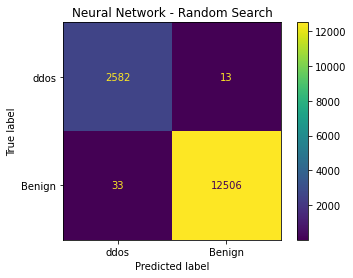

In [17]:
fig_random = plot_confusion_matrix(clf_random, test, test_lbl, labels=['ddos', 'Benign'])
fig_random.ax_.set_title('Neural Network - Random Search')
fig_random.figure_.savefig('img/confusion_matrix_nn_random.png')

## Modell speichern

In [20]:
dump(clf_grid, 'models/neural_network_fast_grid.model')

['models/neural_network_2.joblib']

In [22]:
dump(clf_random, 'models/neural_network_fast_random.model')

['models/neural_network_fast_random.model']